Question #1  $$ p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}} \tag{4.2}$$ 
$$ 1-p(x) = 1- \frac{e^{\beta_0 + \beta_1X}}{1+e^{\beta_0 + \beta_1X}} $$
$$ 1-p(x) = \frac{1+e^{\beta_0 + \beta_1X}-{e^{\beta_0 + \beta_1X}}}{1+e^{\beta_0 + \beta_1X}} $$
$$ 1-p(x) = \frac{1}{1+e^{\beta_0 + \beta_1X}} $$

$$ \frac{p(x)}{1-p(x)} = \frac{\frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}} }{\frac{1}{1+e^{\beta_0 + \beta_1X}} } $$

$$ \frac{p(x)}{1-p(x)} = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}{\frac{1+e^{\beta_0 + \beta_1X}}{1} } $$

$$ \frac{p(x)}{1-p(x)} = e^{\beta_0 + \beta_1X} \tag{4.3} $$


In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [27]:
weekly = pd.read_csv('./weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [28]:
X = weekly.loc[:, 'Lag1':'Volume']
y = pd.get_dummies(weekly['Direction'])['Up']

sm_logit = sm.Logit(y, sm.add_constant(X)).fit()
sm_logit.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 17 Aug 2025   Pseudo R-squ.:                0.006580
Time:                        10:23:13   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [29]:
weekly.loc[:, 'Year':'Today'].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [30]:
X_sk = weekly.loc[:, 'Lag1':'Volume']
y_sk = weekly['Direction']

sk_logit = LogisticRegression(fit_intercept=True)
sk_logit.fit(X_sk, y_sk)
sk_logit.intercept_, sk_logit.coef_

(array([0.26685095]),
 array([[-0.04123352,  0.05839182, -0.01604123, -0.02777908, -0.01445306,
         -0.02273943]]))

In [31]:
acc_score = accuracy_score(y_sk, sk_logit.predict(X_sk))
print(f'Accuracy: {acc_score}')
print(f'Training Error: {1-acc_score}')

Accuracy: 0.5610651974288338
Training Error: 0.43893480257116624


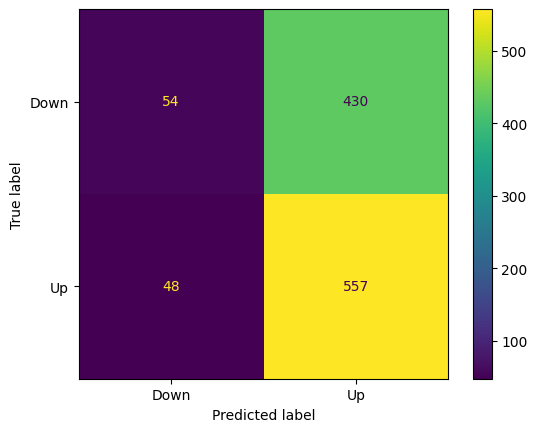

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_sk, sk_logit.predict(X_sk)), display_labels=['Down', 'Up'])
disp.plot()

In [33]:
training_set = weekly[weekly.Year <= 2008]
test_set = weekly[weekly.Year >= 2009]

X_train = training_set.Lag2.values.reshape(-1, 1)
y_train = training_set.Direction

X_test = test_set.Lag2.values.reshape(-1, 1)
y_test = test_set.Direction
sk_logit_2 = LogisticRegression(fit_intercept=True)
sk_logit_2.fit(X_train, y_train)

sk_logit_2.intercept_, sk_logit_2.coef_


(array([0.20323048]), array([[0.0580307]]))

In [34]:
acc_score = accuracy_score(y_test, sk_logit_2.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.625
Test Error: 0.375


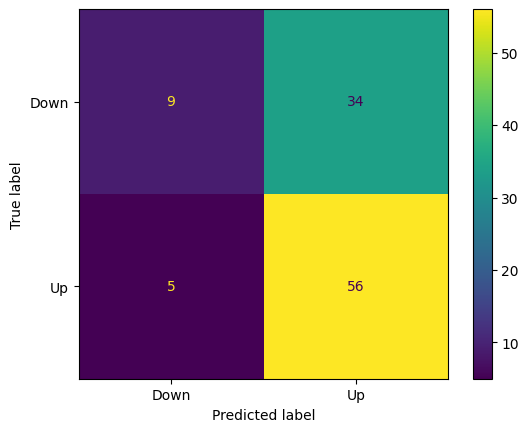

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, sk_logit_2.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

In [36]:
weekly_lda = LinearDiscriminantAnalysis()
weekly_lda.fit(X_train, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [37]:
acc_score = accuracy_score(y_test, weekly_lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.625
Test Error: 0.375


In [38]:
weekly_qda = QuadraticDiscriminantAnalysis()
weekly_qda.fit(X_train, y_train)

,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


In [39]:
acc_score = accuracy_score(y_test, weekly_qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5865384615384616
Test Error: 0.41346153846153844


In [40]:
weekly_knn = KNeighborsClassifier(n_neighbors=1)
weekly_knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
acc_score = accuracy_score(y_test, weekly_knn.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5096153846153846
Test Error: 0.4903846153846154


In [42]:
weekly_naive_bayes = GaussianNB()
weekly_naive_bayes.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [43]:
acc_score = accuracy_score(y_test, weekly_naive_bayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5865384615384616
Test Error: 0.41346153846153844


13.i
If we use overall accuracy of the models as our criteria to choose the model with the best performance rates, we get Logistic Regression, and LDA giving the best accuracy.